# Intro to Classification Lab 1

In this lab we will learn how to generate synthetic data and how to apply various built-in classifiers to classify the data. The goal of this lab is to introduce you to a subset of classifcation methods and which methods perform better depending on the structure of the data. We will also see where data visulaization and background information can come in handy!

In [18]:
# Import base libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Python's scikit-learn (or sklearn) is a Machine Learning library equipped with simple and efficient tools for data mining and data analysis. In general, a learning problem consists of a set of $n$ samples of data and then tries to predict properties of _unknown_ data.

If each sample is **more** than a single number (aka multivariate), it is said to have several attributes or **features**. 

We will mainly focus on **supervised** learning, in which each input data has an associated label. If we have time, we will discuss unsupervised learning and what techniques are commonly used today.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

X, y = make_classification(n_classes = 2, n_samples = 100, \
                           n_features = 2, n_redundant = 0, \
                           random_state = 1, n_clusters_per_class = 1)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape) # add some noise to the data
linearly_separable = (X, y)

*make_classification* generates a random classification problem where the number of class is user-specified. Later we will see *make_moons* and *make_circles*.

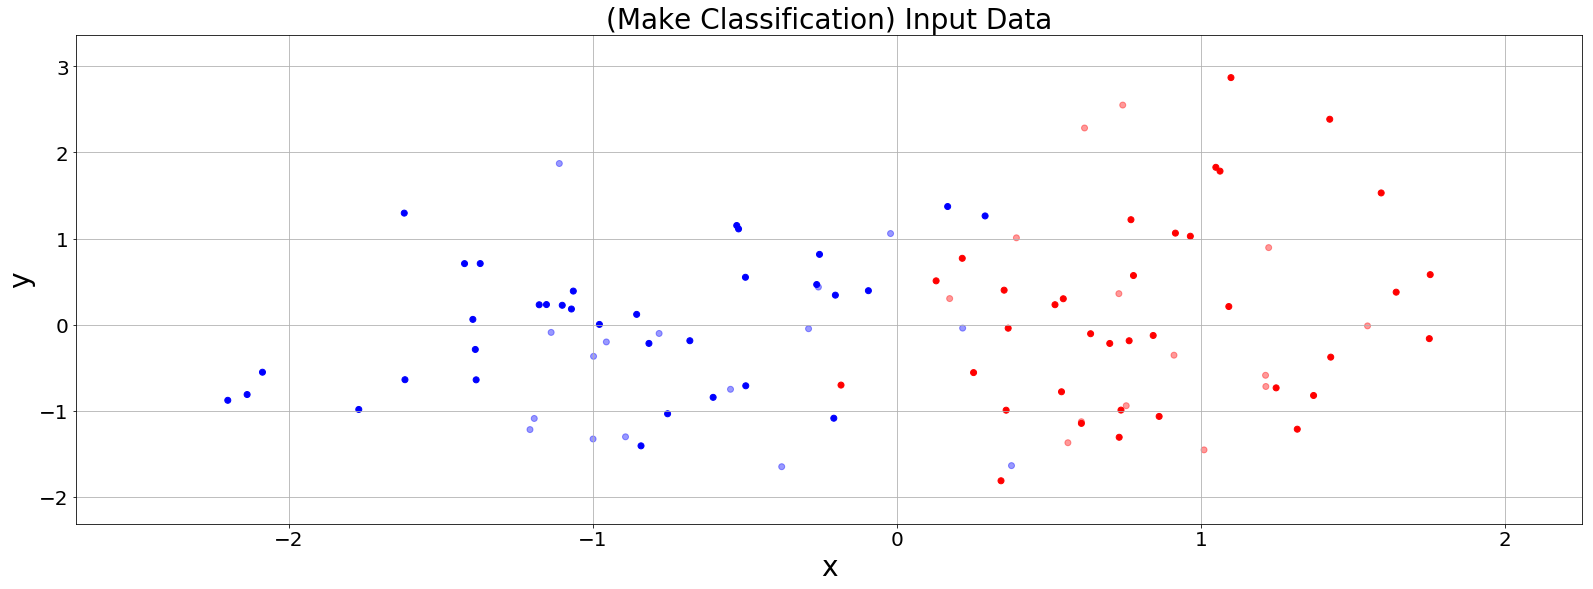

In [20]:
figure = plt.figure( figsize=(27,9) )
color_map = plt.cm.RdBu #Red-Blue colormap
cm_bright = ListedColormap(['#FF0000','#0000FF'])

X = StandardScaler().fit_transform(X)# center and scale the data

# Split the data to reserve some for model validation
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=42)
    
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 # for plotting
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 # y-axis, not to be confused with y labels

# Don't worry about the mesh grid now, we will use it to make pretty plots!
h = 0.02 # the mesh step size
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


plt.title("(Make Classification) Input Data", fontsize = 28)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4)

plt.axis([x_min, x_max, y_min, y_max])
plt.grid(True)
plt.xlabel('x', fontsize = 28), plt.ylabel('y', fontsize = 28)
plt.tick_params(labelsize = 20)
plt.show()

plt.close()

# $K$-Nearest Neighbors

The first classifier we are going to consider is $k$-nearest neighbors. The idea behind the method is that the input consists of the $k$ closest training examples in the feature space. An object is classified by a **majority vote** of its neighbors, with the object being assignmed to the class most common among its **_k_** nearest neighbors, hence the name.

**Activity! Get up!**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

names = ["Nearest Neighbors"]
#cl = [KNeighborsClassifier(3,weights = 'distance')] # Let's choose k=3
cl = [KNeighborsClassifier(3)] # Let's choose k=3

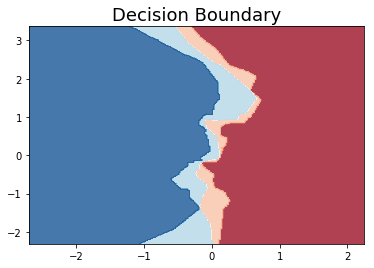

In [22]:
cl[0].fit(X_train,y_train)
score = cl[0].score(X_test,y_test)

# Plot the decision boundary for which we will assign a color to each class
# concatonate vectorized grid and compute probability estimates for the data

Z = cl[0].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1] # with confidence bds
#Z = cl[0].predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z, cmap = color_map, alpha= 0.8)
plt.title('Decision Boundary', fontsize = 18)

plt.show()
plt.close()

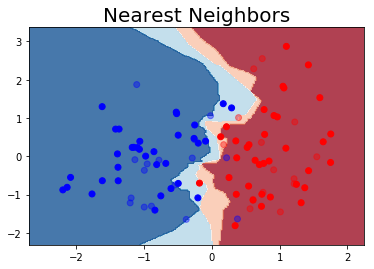

In [23]:
# Adding the data...
plt.contourf(xx,yy,Z, cmap = color_map, alpha= 0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4)
plt.title(names[0], fontsize = 20)

plt.show()
plt.close()

In [7]:
#np.set_printoptions(threshold='nan')
#cl[0].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1] # with confidence bds
print(score) 

0.9


Not bad! We see that the $k$-nearest neighbors algorithm was able to classify the unseen data with an accuracy of 90%!

# Decision Tree

Next, we will take a look at Decision Tree Classification. A decision tree is a flowchart-like structure in which each internal **node** represents a "test" on an attribute (or feature), each **branch** represents the outcome of the test, and each **leaf** node represents a class label. 


In [24]:
from IPython.display import Image
Image(url='https://image.slidesharecdn.com/decisiontree-151015165353-lva1-app6892/95/classification-using-decision-tree-12-638.jpg?cb=1444928106')

In [9]:
Image(url='http://help.prognoz.com/en/mergedProjects/Lib/img/decisiontree.gif')

In [25]:
from sklearn.tree import DecisionTreeClassifier

names.append("Decision Tree")
cl.append(DecisionTreeClassifier(max_depth=5))

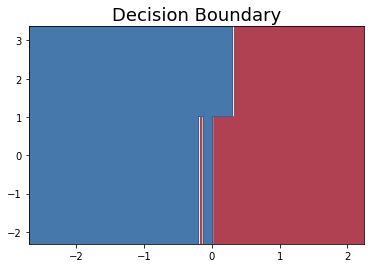

In [26]:
cl[1].fit(X_train,y_train)
score = cl[1].score(X_test,y_test)

# Plot the decision boundary for which we will assign a color to each class
# concatonate vectorized grid and compute probability estimates for the data

#Z = cl[1].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1] # with confidence bds
Z = cl[1].predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z, cmap = color_map, alpha= 0.8)
plt.title('Decision Boundary', fontsize = 18)

plt.show()
plt.close()

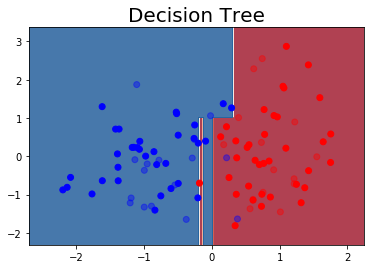

In [12]:
# Adding the data...
plt.contourf(xx,yy,Z, cmap = color_map, alpha= 0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4)
plt.title(names[1], fontsize = 20)

plt.show()
plt.close()

In [13]:
print(score) 

0.933333333333


Even better! A Decision Tree Classifier was able to predict the unseen data labels with an accuracy of over 93%!

# Different Structured Data

Now let's take a look at how these algorithms perform on data with different structural relationships. As you may think, sklearn's *make_moons* can artificial generate data whose class labeling's form "moons" around each other. Similarily, *make_circles* generates data grouped with circular structure. 

The cells below provide a visual of the what these functions output.

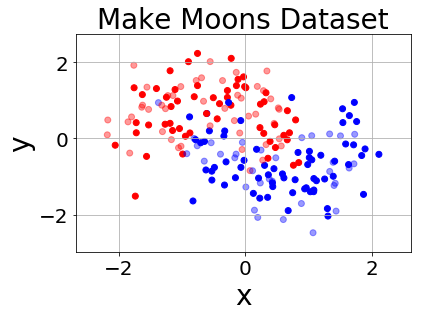

In [27]:
X, y = make_moons(noise = 0.3, random_state = 0, n_samples = 200)
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.4, random_state = 42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


plt.title("Make Moons Dataset", fontsize = 28)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4)

plt.axis([x_min, x_max, y_min, y_max])
plt.grid(True)
plt.xlabel('x', fontsize = 28), plt.ylabel('y', fontsize = 28)
plt.tick_params(labelsize = 20)
plt.show()

plt.close()


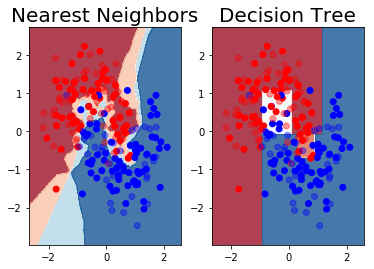

('Nearest Neighbors Score:', 0.86250000000000004)
('Decision Tree Score:', 0.82499999999999996)


In [28]:
ax = plt.subplot(1,2,1)

# Fit make_moons dataset with k-Nearest Neighbors Classifier
cl[0].fit(X_train,y_train)
score = cl[0].score(X_test,y_test)

Z = cl[0].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

ax.contourf(xx,yy,Z, cmap = color_map, alpha= 0.8)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4)
ax.set_title(names[0], fontsize = 20)

# Fit make_circles dataset with Decision Tree Classifier
ax2 = plt.subplot(1,2,2)
cl[1].fit(X_train,y_train)
score2 = cl[1].score(X_test,y_test)

Z = cl[1].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

ax2.contourf(xx,yy,Z, cmap = color_map, alpha= 0.8)
ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4)
ax2.set_title(names[1], fontsize = 20)

plt.show()
plt.close()

print("Nearest Neighbors Score:",score)
print("Decision Tree Score:",score2)

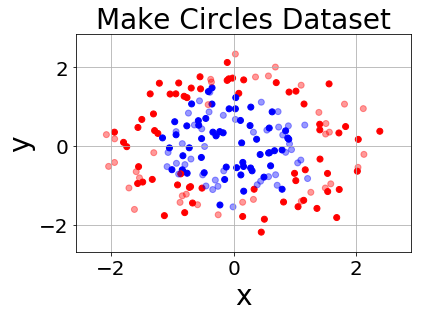

In [31]:
X, y = make_circles(noise = 0.2, factor = 0.5, random_state = 1,n_samples = 200)
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.4, random_state = 42)
    
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.title("Make Circles Dataset", fontsize = 28)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4)

plt.axis([x_min, x_max, y_min, y_max])
plt.grid(True)
plt.xlabel('x', fontsize = 28), plt.ylabel('y', fontsize = 28)
plt.tick_params(labelsize = 20)
plt.show()

plt.close()


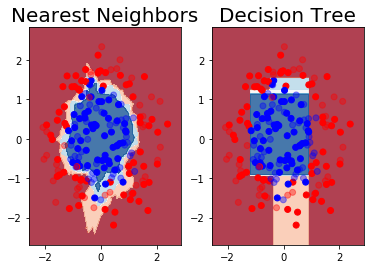

('Nearest Neighbors Score:', 0.875)
('Decision Tree Score:', 0.83750000000000002)


In [30]:
ax = plt.subplot(1,2,1)

# Fit make_circles dataset with k-Nearest Neighbors Classifier
cl[0].fit(X_train,y_train)
score = cl[0].score(X_test,y_test)

Z = cl[0].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

ax.contourf(xx,yy,Z, cmap = color_map, alpha= 0.8)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4)
ax.set_title(names[0], fontsize = 20)

# Fit make_circles dataset with Decision Tree Classifier
ax2 = plt.subplot(1,2,2)
cl[1].fit(X_train,y_train)
score2 = cl[1].score(X_test,y_test)

Z = cl[1].predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

ax2.contourf(xx,yy,Z, cmap = color_map, alpha= 0.8)
ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.4)
ax2.set_title(names[1], fontsize = 20)

plt.show()
plt.close()

print("Nearest Neighbors Score:",score)
print("Decision Tree Score:",score2)